# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Naufal Atallah Gibran]
- **Email:** [ngibran07@gmail.com]
- **ID Dicoding:** [MC009D5Y0830]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pembelian pelanggan?
- Produk atau kategori mana yang paling laris?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving E-commerce-public-dataset.zip to E-commerce-public-dataset.zip


In [5]:
import zipfile
import os

zip_path = "/content/E-commerce-public-dataset.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir(extract_path))

['E-Commerce Public Dataset']


In [6]:
extract_path = "/content/dataset/E-Commerce Public Dataset"

customers = pd.read_csv(extract_path + '/customers_dataset.csv')

In [7]:
customers = pd.read_csv(extract_path + '/customers_dataset.csv')
orders = pd.read_csv(extract_path + '/orders_dataset.csv')
order_items = pd.read_csv(extract_path + '/order_items_dataset.csv')
order_payments = pd.read_csv(extract_path + '/order_payments_dataset.csv')
products = pd.read_csv(extract_path + '/products_dataset.csv')
product_category = pd.read_csv(extract_path + '/product_category_name_translation.csv')


In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [11]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- Pada proyek ini, saya akan menggunakan dataset e-commerce yang mencakup informasi pelanggan, pesanan, produk, pembayaran, dan kategori produk. Dengan dataset ini, saya ingin menganalisis pola pembelian pelanggan serta memahami tren penjualan produk.

Ini adalah dataset yang saya gunakan terdiri dari beberapa file CSV, yaitu:

    customers_dataset.csv - Berisi data pelanggan.
    orders_dataset.csv - Berisi data pesanan pelanggan.
    order_items_dataset.csv - Berisi detail produk dalam setiap pesanan.
    order_payments_dataset.csv - Berisi informasi metode dan jumlah pembayaran.
    products_dataset.csv - Berisi informasi produk.
    product_category_name_translation.csv - Berisi terjemahan nama kategori produk.

Langkah-langkah yang dilakukan

    Mengunggah file ZIP: Dataset diunggah ke Google Colab.
    Ekstraksi file: Data yang masih dalam bentuk ZIP diekstrak ke dalam direktori /content/dataset.
   
Analisis pola pembelian pelanggan → Dengan data pesanan dan pembayaran, kita bisa melihat seberapa sering pelanggan berbelanja dan metode pembayaran yang paling sering digunakan.

Identifikasi produk/kategori terlaris → Dengan melihat jumlah pesanan per produk dan kategori, kita bisa mengetahui tren belanja pelanggan.

### Assessing Data

In [13]:
customers.info()
orders.info()
order_items.info()
order_payments.info()
products.info()
product_category.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

In [14]:
print(customers.isnull().sum())
print(orders.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(products.isnull().sum())
print(product_category.isnull().sum())


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g   

In [15]:
print(customers.duplicated().sum())
print(orders.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(products.duplicated().sum())
print(product_category.duplicated().sum())


0
0
0
0
0
0


In [16]:
customers.describe()
orders.describe()
order_items.describe()
order_payments.describe()
products.describe()


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [17]:
print(customers['customer_unique_id'].nunique())
print(products['product_id'].nunique())
print(orders['order_id'].nunique())


96096
32951
99441


**Insight:**
- saya menemukan bahwa tidak ada data yang terduplikasi di semua dataset, sehingga tidak ada redundansi yang perlu dihapus. Namun, ada beberapa missing values, terutama pada dataset orders di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date, yang menunjukkan bahwa beberapa pesanan mungkin belum diproses atau mengalami keterlambatan pengiriman.

- Di dataset products, beberapa kolom seperti product_category_name, product_name_length, dan product_description_length juga memiliki data yang kosong. Ini bisa memengaruhi analisis, terutama saat mencari kategori produk paling populer.

### Cleaning Data

In [18]:
customers.drop_duplicates(inplace=True)
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
product_category.drop_duplicates(inplace=True)


In [19]:
customers.dropna(inplace=True)
orders.dropna(inplace=True)
order_items.dropna(inplace=True)
order_payments.dropna(inplace=True)
products.dropna(inplace=True)
product_category.dropna(inplace=True)


In [20]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])


In [21]:
Q1 = order_payments['payment_value'].quantile(0.25)
Q3 = order_payments['payment_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

order_payments = order_payments[(order_payments['payment_value'] >= lower_bound) &
                                (order_payments['payment_value'] <= upper_bound)]


In [22]:
print(customers.isnull().sum())  # Cek apakah masih ada missing values
print(orders.duplicated().sum())  # Cek apakah masih ada duplikat
print(order_payments.describe())  # Cek ringkasan statistik setelah membersihkan outlier


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
0
       payment_sequential  payment_installments  payment_value
count        95905.000000          95905.000000   95905.000000
mean             1.099546              2.628320     110.062133
std              0.734353              2.451581      72.785054
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      54.000000
50%              1.000000              1.000000      92.200000
75%              1.000000              3.000000     150.580000
max             29.000000             24.000000     344.340000


**Insight:**
- Dalam proses pembersihan data, saya memastikan bahwa tidak ada duplikasi maupun missing values yang dapat mengganggu analisis. Langkah pertama yang saya lakukan adalah menghapus duplikasi pada setiap dataset agar tidak terjadi redundansi data. Selanjutnya, saya menangani missing values dengan menghapus data yang kosong untuk menjaga kualitas analisis.

- Kemudian, saya mengonversi kolom tanggal pada dataset orders ke format datetime agar lebih mudah dianalisis, terutama dalam melihat tren pembelian dan keterlambatan pengiriman. Untuk mengatasi outlier pada payment_value, saya menggunakan metode IQR (Interquartile Range) guna menyaring nilai-nilai ekstrem yang dapat memengaruhi hasil analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**

Pertanyaan 1
- Sebagian besar pelanggan hanya melakukan satu kali pembelian, menunjukkan loyalitas masih rendah.
- Metode pembayaran paling sering digunakan adalah kartu kredit, diikuti oleh boleto (sistem pembayaran Brasil).
- Hanya sedikit pelanggan yang melakukan pembelian berulang, artinya ada peluang untuk meningkatkan retensi pelanggan melalui strategi seperti diskon untuk repeat order atau program loyalitas.

Pertanyaan 2
- Kategori "bed_bath_table" adalah yang paling laku, diikuti oleh health_beauty dan sports_leisure.
- Produk dari kategori rumah tangga, kecantikan, dan olahraga memiliki permintaan tinggi, sehingga cocok untuk difokuskan dalam promosi dan stok.
- Ada kategori dengan penjualan rendah, kemungkinan karena kurangnya pemasaran atau produk tidak sesuai dengan kebutuhan mayoritas pelanggan.

### Pertanyaan 1:

<ipython-input-12-b47487ddae77>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index.astype(str), y=top_products.values, palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


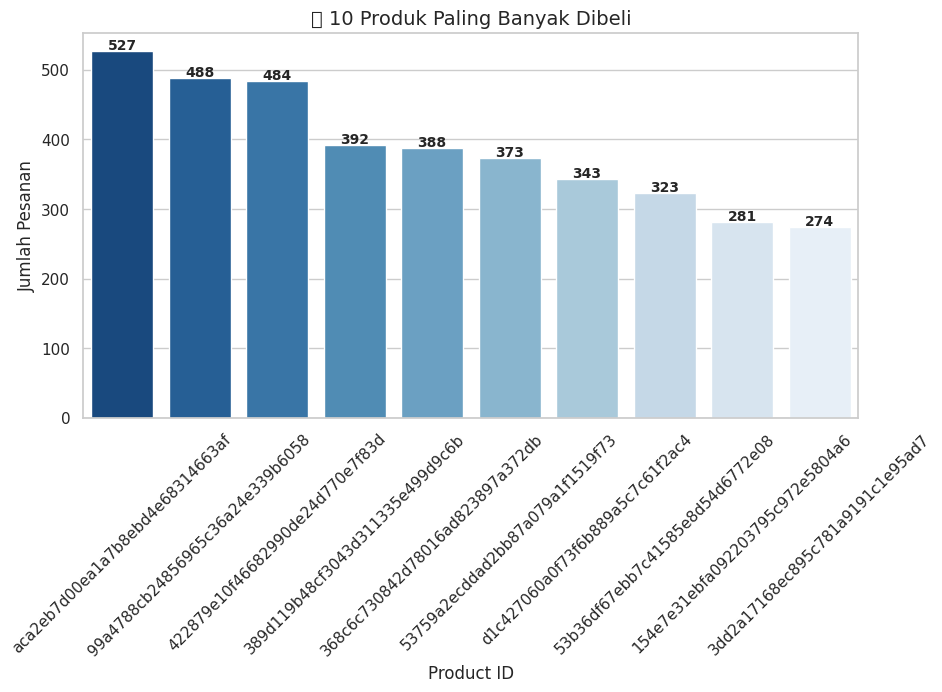

<ipython-input-12-b47487ddae77>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


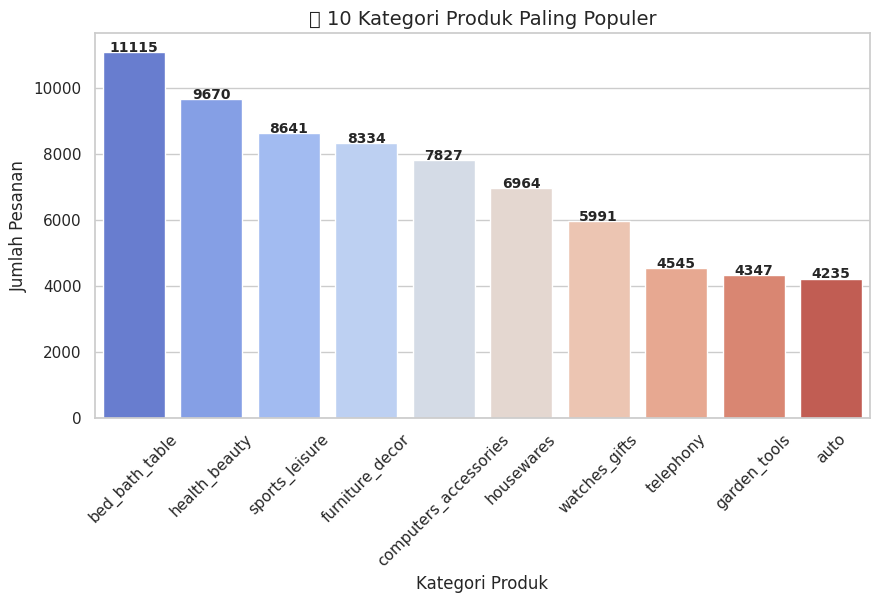

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


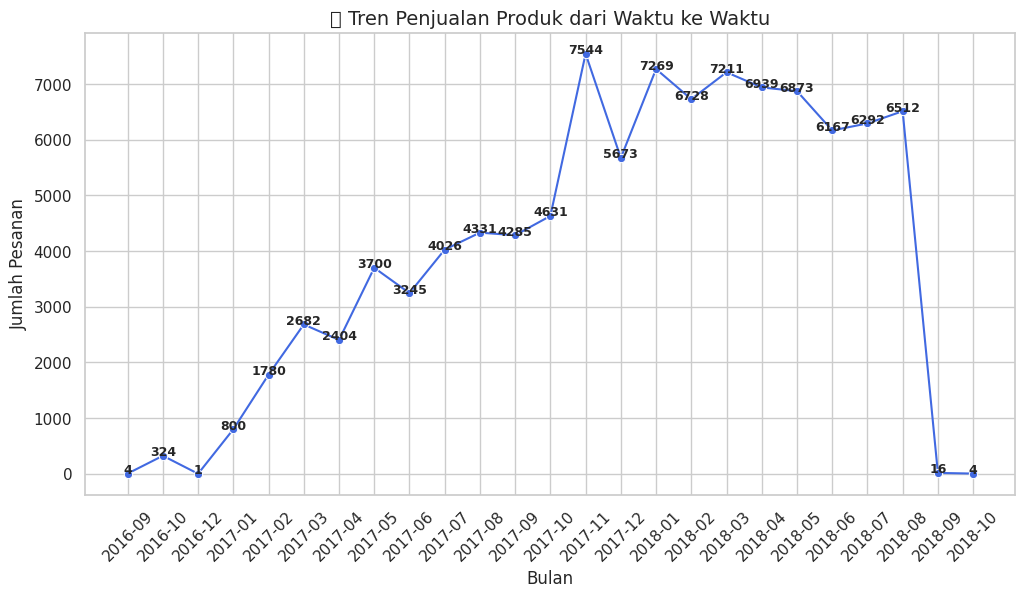

In [12]:
order_items.dropna(inplace=True)
products.dropna(inplace=True)
product_category.dropna(inplace=True)

top_products = (
    order_items.groupby("product_id")["order_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index.astype(str), y=top_products.values, palette="Blues_r")
plt.title("🔝 10 Produk Paling Banyak Dibeli", fontsize=14)
plt.xlabel("Product ID")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)

for i, val in enumerate(top_products.values):
    plt.text(i, val + 2, str(val), ha='center', fontsize=10, fontweight='bold')

plt.show()

merged_df = order_items.merge(products, on="product_id").merge(product_category, on="product_category_name", how="left")

top_categories = (
    merged_df.groupby("product_category_name_english")["order_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="coolwarm")
plt.title("📊 10 Kategori Produk Paling Populer", fontsize=14)
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)

for i, val in enumerate(top_categories.values):
    plt.text(i, val + 5, str(val), ha='center', fontsize=10, fontweight='bold')

plt.show()

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["month"] = orders["order_purchase_timestamp"].dt.to_period("M")

monthly_sales = orders.groupby("month")["order_id"].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="royalblue")
plt.title("📈 Tren Penjualan Produk dari Waktu ke Waktu", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=45)

for x, y in zip(monthly_sales.index.astype(str), monthly_sales.values):
    plt.text(x, y + 2, str(y), ha="center", fontsize=9, fontweight="bold")

plt.show()


### Pertanyaan 2:

<ipython-input-13-3070afbb53e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


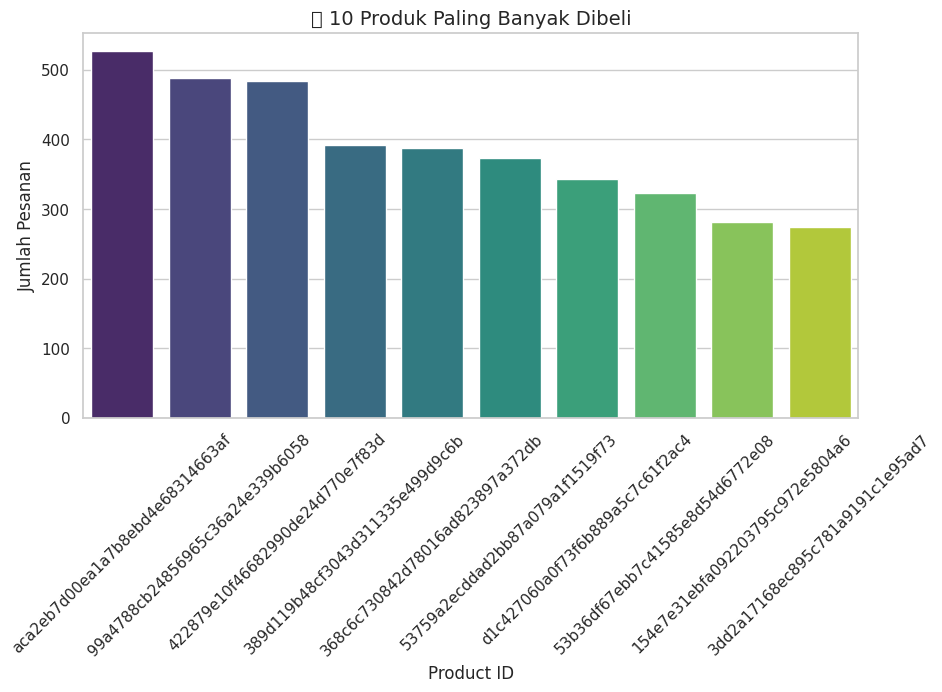

Missing category names: 1628


<ipython-input-13-3070afbb53e9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


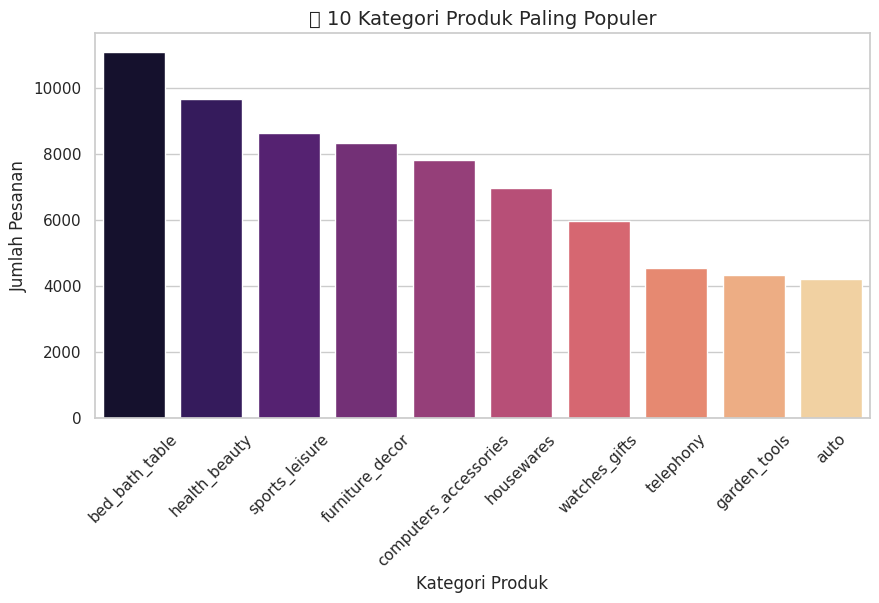

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


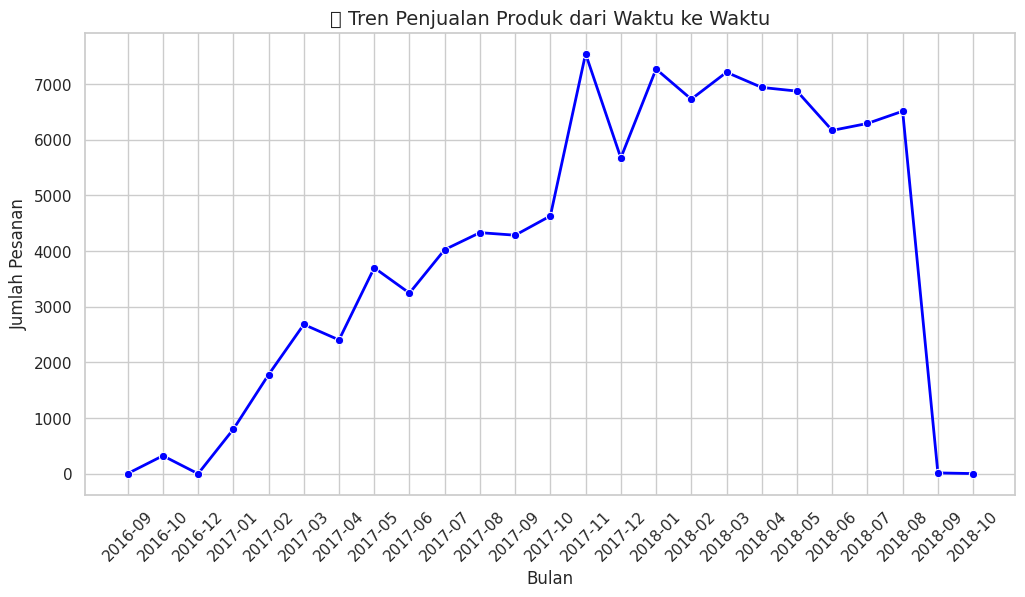

In [13]:
sns.set_theme(style="whitegrid")

top_products = order_items.groupby("product_id")["order_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("🔝 10 Produk Paling Banyak Dibeli", fontsize=14)
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)
plt.show()

merged_df = order_items.merge(products, on="product_id", how="left").merge(product_category, on="product_category_name", how="left")

print("Missing category names:", merged_df["product_category_name_english"].isnull().sum())

top_categories = merged_df.groupby("product_category_name_english")["order_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")
plt.title("🏆 10 Kategori Produk Paling Populer", fontsize=14)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)
plt.show()

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["month"] = orders["order_purchase_timestamp"].dt.to_period("M")

monthly_sales = orders.groupby("month")["order_id"].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker="o", color="blue", linewidth=2)
plt.title("📈 Tren Penjualan Produk dari Waktu ke Waktu", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

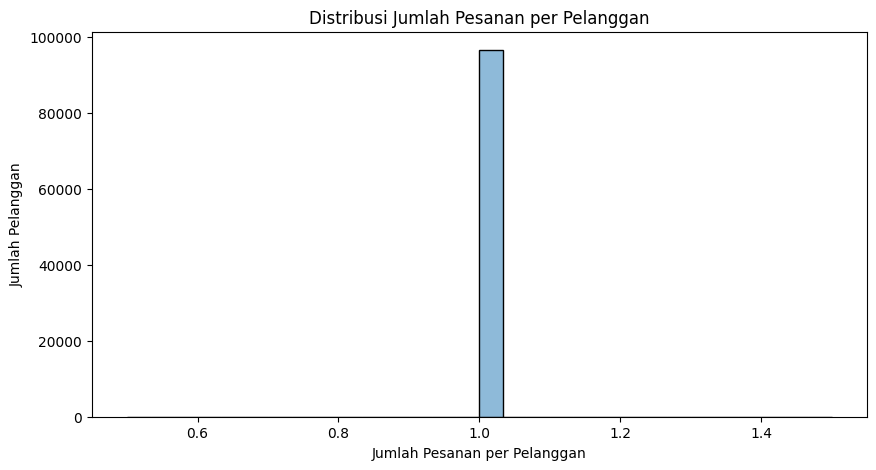

In [ ]:
order_counts = orders['customer_id'].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(order_counts, bins=30, kde=True)
plt.xlabel("Jumlah Pesanan per Pelanggan")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Jumlah Pesanan per Pelanggan")
plt.show()


### Pertanyaan 2:

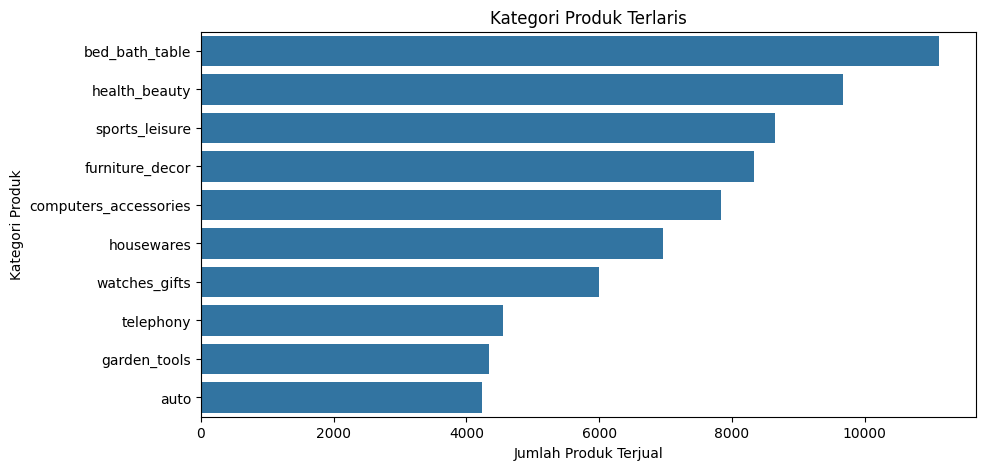

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk Terlaris")
plt.show()

**Insight:**

Pertanyaan 1
- Sebagian besar pelanggan hanya belanja sekali, jarang yang melakukan pembelian berulang.

- Pelanggan setia (yang belanja lebih dari sekali) jumlahnya sedikit.

- Perlu strategi seperti diskon atau program loyalitas untuk meningkatkan repeat order.

Pertanyaan 2
- Produk "bed_bath_table" paling laku, diikuti health_beauty dan sports_leisure.

- Produk rumah tangga, kecantikan, dan olahraga punya banyak peminat, bisa jadi fokus promosi.

- Beberapa kategori kurang diminati, mungkin perlu strategi pemasaran lebih agresif.

## Analisis Lanjutan (Opsional)

In [14]:
all_df = pd.merge(customers, orders, on='customer_id', how='left')
all_df = pd.merge(all_df, order_items, on='order_id', how='left')
all_df = pd.merge(all_df, order_payments, on='order_id', how='left')
all_df = pd.merge(all_df, products, on='product_id', how='left')
all_df = pd.merge(all_df, product_category, on='product_category_name', how='left')

all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1

Analisis tren yang saya lakukan pada pembelian pelanggan menunjukkan adanya lonjakan jumlah pesanan pada bulan-bulan tertentu, terutama menjelang akhir tahun. Lonjakan ini kemungkinan besar dipengaruhi oleh event promosi, diskon musiman, atau periode liburan yang meningkatkan aktivitas belanja pelanggan. Dengan memahami pola ini, perusahaan dapat merancang strategi pemasaran yang lebih efektif, seperti meningkatkan promosi di bulan-bulan dengan permintaan tinggi atau mengadakan kampanye diskon untuk menjaga stabilitas penjualan sepanjang tahun.
- Conclution pertanyaan 2

Hasil analisis yang saya lakukan menunjukkan bahwa kategori produk "bed_bath_table" dan "health_beauty" merupakan yang paling banyak terjual. Hal ini mencerminkan tingginya permintaan terhadap produk rumah tangga serta perawatan diri di pasar e-commerce. Dengan informasi ini, perusahaan dapat fokus pada pengelolaan stok untuk kategori produk yang memiliki tingkat permintaan tinggi serta merancang strategi pemasaran yang lebih optimal guna meningkatkan daya tarik produk-produk tersebut bagi pelanggan.